<a href="https://colab.research.google.com/github/nhatboi154/AI/blob/main/money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [2]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [3]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/baitapai3/money/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 630 images belonging to 11 classes.


In [4]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/baitapai3/money/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 42 images belonging to 11 classes.


In [5]:
training_data.class_indices

{'1000': 0,
 '10000': 1,
 '100000': 2,
 '200': 3,
 '2000': 4,
 '20000': 5,
 '200000': 6,
 '500': 7,
 '5000': 8,
 '50000': 9,
 '500000': 10}

In [6]:
model=Sequential()
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 256 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                    

In [7]:
opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer= 'adam',loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [8]:
history=model.fit(training_data,epochs=50,batch_size=200,verbose=1, validation_data=validation_data, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/50
20/20 [==============================] - 182s 8s/step - loss: 6.7183 - accuracy: 0.0841 - val_loss: 2.3322 - val_accuracy: 0.2143
Epoch 2/50
20/20 [==============================] - 8s 405ms/step - loss: 2.2837 - accuracy: 0.1794 - val_loss: 2.1462 - val_accuracy: 0.1667
Epoch 3/50
20/20 [==============================] - 8s 405ms/step - loss: 2.0420 - accuracy: 0.2794 - val_loss: 1.9379 - val_accuracy: 0.3333
Epoch 4/50
20/20 [==============================] - 8s 406ms/step - loss: 2.1178 - accuracy: 0.2762 - val_loss: 1.9683 - val_accuracy: 0.3095
Epoch 5/50
20/20 [==============================] - 8s 407ms/step - loss: 2.1425 - accuracy: 0.2651 - val_loss: 1.8604 - val_accuracy: 0.3333
Epoch 6/50
20/20 [==============================] - 8s 406ms/step - loss: 2.0934 - accuracy: 0.2968 - val_loss: 1.8580 - val_accuracy: 0.4762
Epoch 7/50
20/20 [==============================] - 8s 404ms/step - loss: 2.0823 - accuracy: 0.2905 - val_loss: 1.5412 - val_accuracy: 0.5476
Epoch 8

<function matplotlib.pyplot.show>

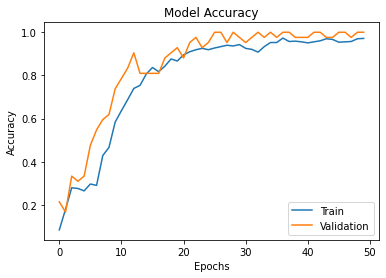

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [10]:
model.save("Nhan_dien_tien.h5")

In [11]:
model_nhandien=load_model('Nhan_dien_tien.h5')

1000


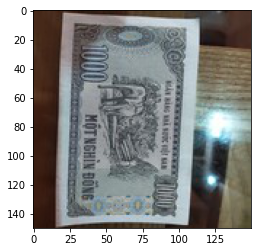

In [12]:
img=load_img("/content/drive/MyDrive/baitapai3/money/validation/1000/3.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='20000'
if round(result[0][5])==1:
  prediction='200000'
if round(result[0][6])==1:
  prediction='500'
if round(result[0][7])==1:
  prediction='5000'
if round(result[0][8])==1:
  prediction='50000'
if round(result[0][9])==1:
  prediction='500000'
print(prediction)

10000


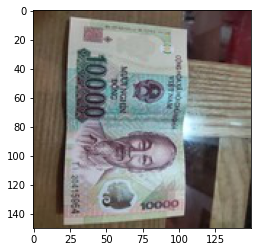

In [13]:
img=load_img("/content/drive/MyDrive/baitapai3/money/validation/10000/1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='20000'
if round(result[0][5])==1:
  prediction='200000'
if round(result[0][6])==1:
  prediction='500'
if round(result[0][7])==1:
  prediction='5000'
if round(result[0][8])==1:
  prediction='50000'
if round(result[0][9])==1:
  prediction='500000'
print(prediction)

100000


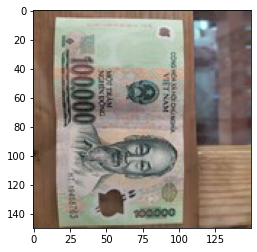

In [15]:
img=load_img("/content/drive/MyDrive/baitapai3/money/test/100000/1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='20000'
if round(result[0][5])==1:
  prediction='200000'
if round(result[0][6])==1:
  prediction='500'
if round(result[0][7])==1:
  prediction='5000'
if round(result[0][8])==1:
  prediction='50000'
if round(result[0][9])==1:
  prediction='500000'
print(prediction)

200


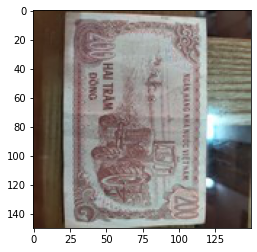

In [ ]:
img=load_img("/content/drive/MyDrive/baitapai3/money/validation/200/1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='20000'
if round(result[0][5])==1:
  prediction='200000'
if round(result[0][6])==1:
  prediction='500'
if round(result[0][7])==1:
  prediction='5000'
if round(result[0][8])==1:
  prediction='50000'
if round(result[0][9])==1:
  prediction='500000'
print(prediction)

20000


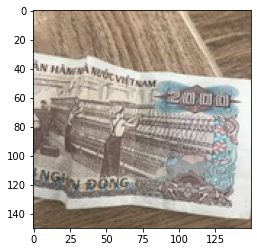

In [20]:
img=load_img("/content/drive/MyDrive/baitapai3/money/test/2000/5.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='20000'
if round(result[0][5])==1:
  prediction='200000'
if round(result[0][6])==1:
  prediction='500'
if round(result[0][7])==1:
  prediction='5000'
if round(result[0][8])==1:
  prediction='50000'
if round(result[0][9])==1:
  prediction='500000'
print(prediction)

200000


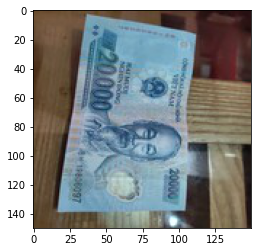

In [26]:
img=load_img("/content/drive/MyDrive/baitapai3/money/test/20000/6.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='20000'
if round(result[0][5])==1:
  prediction='200000'
if round(result[0][6])==1:
  prediction='500'
if round(result[0][7])==1:
  prediction='5000'
if round(result[0][8])==1:
  prediction='50000'
if round(result[0][9])==1:
  prediction='500000'
print(prediction)

500


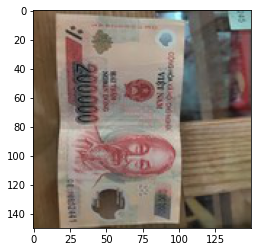

In [29]:
img=load_img("/content/drive/MyDrive/baitapai3/money/test/200000/3.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='20000'
if round(result[0][5])==1:
  prediction='200000'
if round(result[0][6])==1:
  prediction='500'
if round(result[0][7])==1:
  prediction='5000'
if round(result[0][8])==1:
  prediction='50000'
if round(result[0][9])==1:
  prediction='500000'
print(prediction)

5000


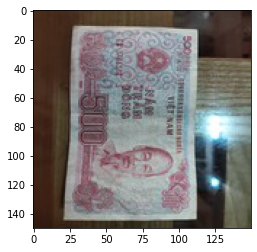

In [ ]:
img=load_img("/content/drive/MyDrive/baitapai3/money/validation/500/2.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='20000'
if round(result[0][5])==1:
  prediction='200000'
if round(result[0][6])==1:
  prediction='500'
if round(result[0][7])==1:
  prediction='5000'
if round(result[0][8])==1:
  prediction='50000'
if round(result[0][9])==1:
  prediction='500000'
print(prediction)

50000


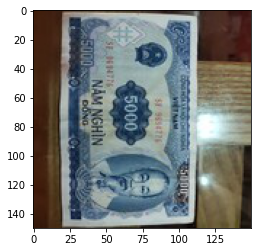

In [ ]:
img=load_img("/content/drive/MyDrive/baitapai3/money/test/5000/7.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='20000'
if round(result[0][5])==1:
  prediction='200000'
if round(result[0][6])==1:
  prediction='500'
if round(result[0][7])==1:
  prediction='5000'
if round(result[0][8])==1:
  prediction='50000'
if round(result[0][9])==1:
  prediction='500000'
print(prediction)

500000


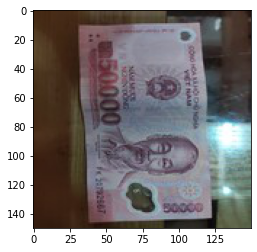

In [ ]:
img=load_img("/content/drive/MyDrive/baitapai3/money/test/50000/f.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='20000'
if round(result[0][5])==1:
  prediction='200000'
if round(result[0][6])==1:
  prediction='500'
if round(result[0][7])==1:
  prediction='5000'
if round(result[0][8])==1:
  prediction='50000'
if round(result[0][9])==1:
  prediction='500000'
print(prediction)

500000


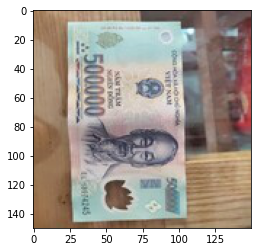

In [ ]:
img=load_img("/content/drive/MyDrive/baitapai3/money/validation/500000/1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='20000'
if round(result[0][5])==1:
  prediction='200000'
if round(result[0][6])==1:
  prediction='500'
if round(result[0][7])==1:
  prediction='5000'
if round(result[0][8])==1:
  prediction='50000'
if round(result[0][9])==1:
  prediction='500000'
print(prediction)